<a href="https://colab.research.google.com/github/Venchislav/Stats-for-DS/blob/main/BonferroniCorrection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [6]:
M = 0  # mean
D = 1  # dispersion

In [8]:
def ttest(a, b):
  se = np.sqrt(a['SD']**2 / a['N'] + b['SD']**2 / b['N'])  # SE - Standard Error
  t = (a['Mx'] - b['Mx']) / se
  deg_freedom = a['N'] + b['N'] - 2
  return stats.t.sf(np.abs(t), deg_freedom) * 2

In [15]:
# n - elems in sample
# m - amount of samples
# a -  probability

def false_alarm(m, n, a):
  attempts = 1000
  hist = {'Yes':0, 'No':0}
  data = list(range(m))

  for i in range(attempts):
    for j in range(m):
      dt = stats.norm.rvs(loc=M, scale=D, size=n)
      data[j] = {'SD':np.std(dt, ddof = 1), 'Mx':np.mean(dt), 'N':n}

    for st, nd in itertools.combinations(data, 2):
      if ttest(st, nd) <= a:
        hist['Yes'] += 1
        break
    else:
      hist['No'] += 1

  barlist = plt.bar(hist.keys(), hist.values())
  barlist[0].set_color('r')
  plt.title(round(hist['Yes'] / attempts, 2))
  plt.ylabel('Amount')
  plt.show()

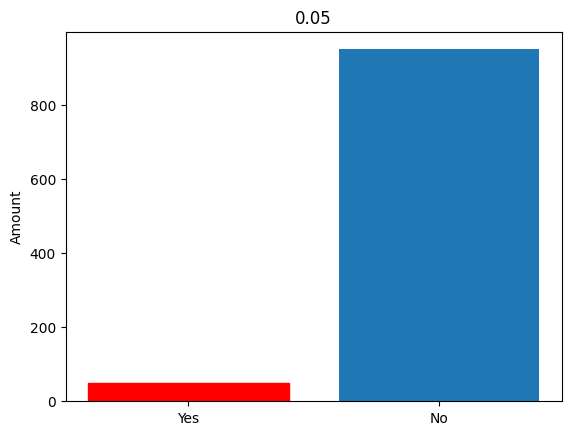

In [21]:
false_alarm(2, 30, 0.05)

Works fine! Right?!

Right?...

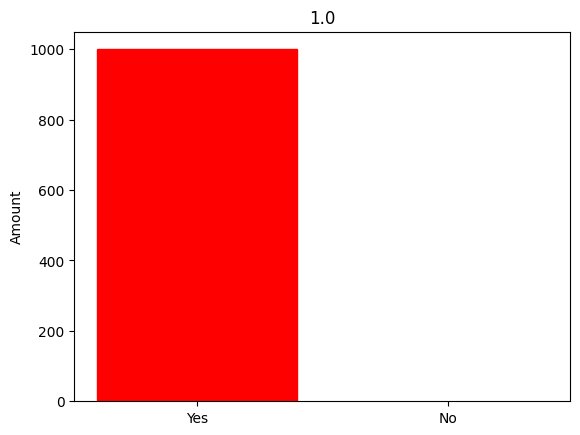

In [22]:
false_alarm(100, 30, 0.05)

It took a while and...
WTH?!
Yep... The thing is that if we have a lot
of samples and logically a lot of combinations we get a positive result there, where it shouldn't appear.

As our chance of getting 'yes' is increasing with every combination...
Stats moment...

In [23]:
# so... What can we do?
# Bonferroni!
# correction...
# but a lot of people hate it...

# We just change alpha from 0.05 to 0.05 / ((m * (m - 1)) / 2)

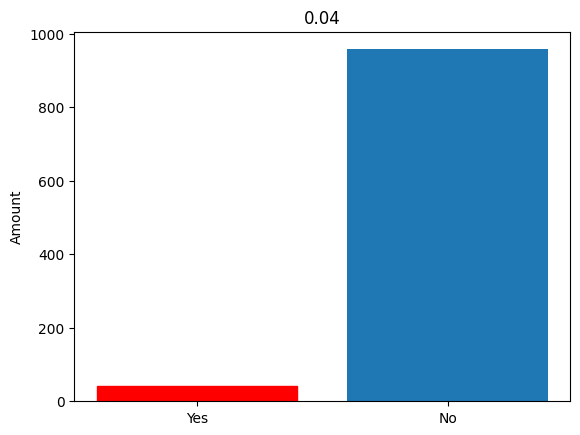

In [25]:
# example for 8 samples:
false_alarm(8, 30, 0.05 / 28)

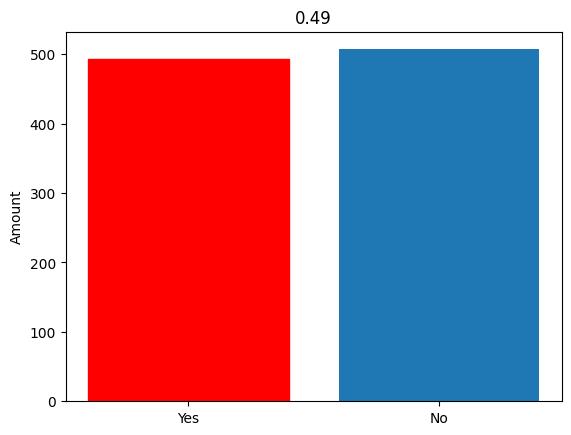

In [26]:
# instead of
false_alarm(8, 30, 0.05)

But why do people hate Bonferonni correction?! It's cool isn't it!?
Actualy 50/50. We minimize chance of getting error 0, but we skip a lot of useful and suitable data. So we increase chance of getting error 1.